In [2]:
import pandas as pd
import numpy as np

# Descriptive Statistics

## Exercise 1

Import the Boston.csv dataset which can be found in the data directory of this course.

        1. Convert the numeric variable indus to a categorical variable with 4 categories:
                 - all the observations lower than the first quartile should be encoded as "A"
                 - all the observations between the first and second quartile should be encoded as "B"
                 - all the observations between the second and third quartile should be encoded as "C"
                 - all the observations higher than the third quartile should be encoded as "D"
                 
                 
        2. Convert the numeric variable rm to a categorical variable with 2 categories:
                - all the observations lower than the mean should be encoded as "X"
                - all the observations higher than the mean should be encoded as "Y"
                
        3. Get a crosstab for the two encoded variables

In [3]:
# define path of datafile
data_path = "../data/Boston.csv"

# import the data
df = pd.read_csv(data_path)

In [4]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
# get the quartiles of indus variable
first_q = np.percentile(df["indus"], q=25)
second_q = np.percentile(df["indus"], q=50)
third_q = np.percentile(df["indus"], q=75)

In [6]:
# define function to encode
def encode_indus(column_row):
    
    if column_row < first_q:
        return("A")
    elif column_row < second_q:
        return("B")
    elif column_row < third_q:
        return("C")
    else:
        return("D")

In [7]:
# encode indus
df["indus_encoded"] = df["indus"].apply(encode_indus)

In [8]:
# get the mean of the rm variable
mean_rm = df["rm"].mean()

In [9]:
# encode rm
df["rm_encoded"] = df["rm"].apply(lambda x: "X" if x < mean_rm else "Y")

In [10]:
# get crosstab between two encoded variables
pd.crosstab(df["indus_encoded"], df["rm_encoded"])

rm_encoded,X,Y
indus_encoded,,
A,29,97
B,73,51
C,51,16
D,125,64


## Exercise 2

Import the Boston.csv dataset which can be found in the data directory of this course.
Write a program that returns the 3 variable pairs with the highest correlations.

In [11]:
# define path of datafile
data_path = "../data/Boston.csv"

# import the data
df = pd.read_csv(data_path)

In [12]:
# check
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [13]:
# get all the variables
all_vars = df.columns

# initialize correlation container
corr_container = list()

# loop through all the vars
for i in range(len(all_vars)):
    
    # get the current var name
    current_var_name = all_vars[i]
    
    # loop through all the remaining vars
    for j in range(i+1, len(all_vars)):
        
        # get the next var name
        next_var_name = all_vars[j]
        
        # get the absolute correlation between the current var and the next var
        corr = np.abs(np.corrcoef(df[current_var_name], df[next_var_name])[0, 1])
        
        # add to correlation container
        corr_container.append({"var_1": current_var_name, "var_2": next_var_name, "corr": corr})
        

# convert to pandas DataFrame
corr_df = pd.DataFrame(corr_container)

# sort by correlation
corr_df = corr_df.sort_values(by="corr", ascending=False)

# get top 2
top_3 = corr_df.head(3)

# check
top_3

,corr,var_1,var_2
76,0.910228,rad,tax
48,0.769230,nox,dis
26,0.763651,indus,nox


# Plotting

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

## Exercise 1

Import the Boston.csv dataset which can be found in the data directory of this course. 
Create a heatmap that shows the correlation between each of the variables. Make sure that the correlation values are shown and that the linewidths are adapted to make the plot easier to interpret.
Compare this heatmap with the results that you obtained in Exercise 2 of Descriptive Statistics 
and check if these were correct.

In [15]:
# define path of datafile
data_path = "../data/Boston.csv"

# import the data
df = pd.read_csv(data_path)

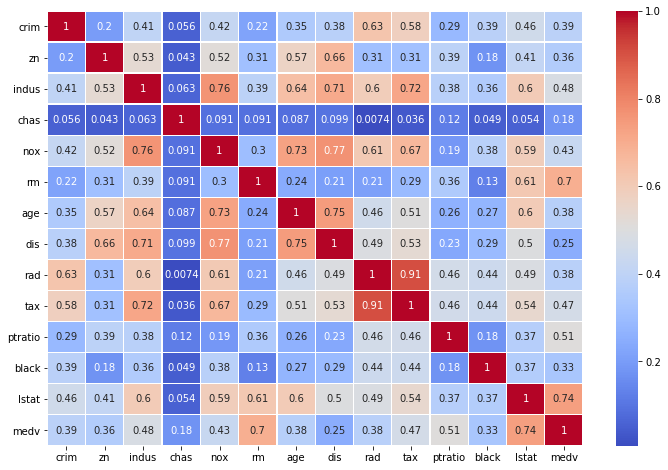

In [16]:
# get matrix of absolute correlations to make comparison with previous results easier
corr_matrix = df.corr().abs()
# initialize figure
plt.figure(figsize=(12, 8))
# plot heatmap
sns.heatmap(data=corr_matrix, annot=True, linewidths=0.3, cmap="coolwarm")
# check
plt.show()

## Exercise 2

Import the Boston.csv dataset which can be found in the data directory of this course.
In this exerise, we want to investage the relationship between the independent variables and the dependent variable in a bit more detail. 
        
    1. Create a figure wich contains multiple plots with each plot being a scatter plot showing the relationship
       between one of the independent variables and the dependent variable. The depenent variable for this dataset 
       is represented by "medv", which is the median value of a house in a specific area in Boston.

    2. Set the labels for the x-axis and y-axis to the names of the variables

    3. Add a title that shows the correlation between the two variables

Your plot should look like this:

<img src="./img/plot_3.png" width="400">

In [18]:
# define path of datafile
data_path = "../data/Boston.csv"

# import the data
df = pd.read_csv(data_path)

In [19]:
# get all the variables
all_vars = list(df.columns)

# get all the independent vars
all_vars.remove("medv")

# check number of independent vars to determine number of subplots
len(all_vars)

13

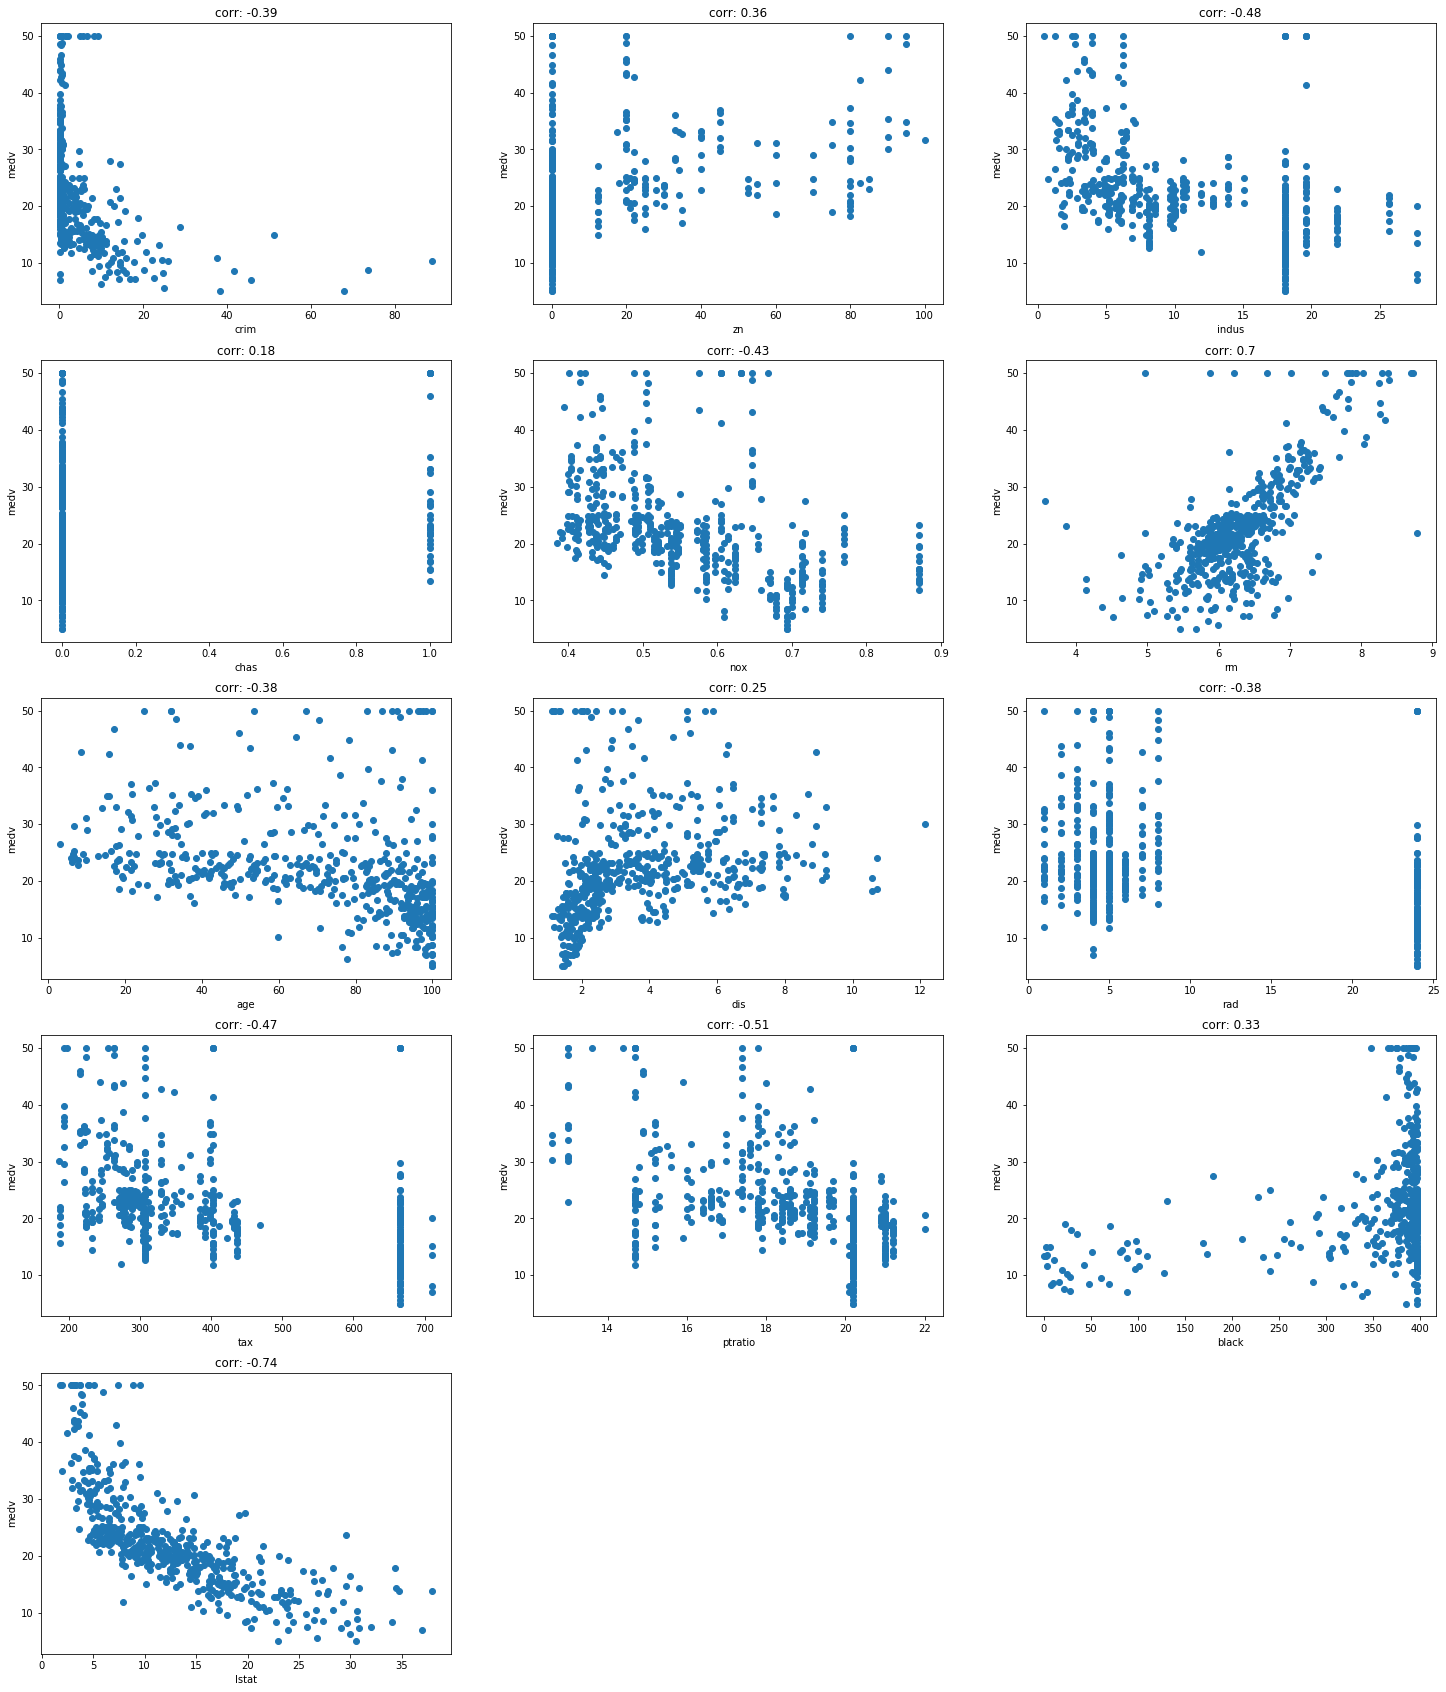

In [20]:
# so we are going to make a figure with a 5 * 3 grid

# initialize the figure
plt.figure(figsize=(25, 30))

# initialize the subplot counter
counter = 1

# loop through the independent vars
for var in all_vars:
    
    # define the subplot
    plt.subplot(5, 3, counter)
    # create scatter plot
    plt.scatter(df[var], df["medv"])
    # get correlation
    corr = np.corrcoef(df[var], df["medv"])[0, 1]
    # add title
    plt.title("corr: %s" %round(corr, 2))
    # add labels
    plt.xlabel(var)
    plt.ylabel("medv")
    # update counter
    counter += 1

# show plot
plt.show()

## Exercise 3

Import the company_sales_data.csv dataset which can be found in the data directory of this course. 
This data contains the monthly sales for each product for a specific year of a specific company. 
Create a stacked bar plot such that for every month the percentage a product contributed to the total sales of that month is shown.

The plot should look like this:


<img src="./img/plot_4.png" width="400">

In [21]:
# define the path of the datafile
data_path = "../data/company_sales_data.csv"

# import the data
df = pd.read_csv(data_path)

In [22]:
# define the product names
product_names = ["facecream", "facewash", "toothpaste", "bathingsoap", "shampoo", "moisturizer"]


# get the total sales per month
total_sales_per_month = np.sum(df[product_names], axis=1)


# loop through names
for name in product_names:
    # get percentage sales
    perc_sales = df[name] / total_sales_per_month
    # add to df
    df[name + "_perc"] = perc_sales

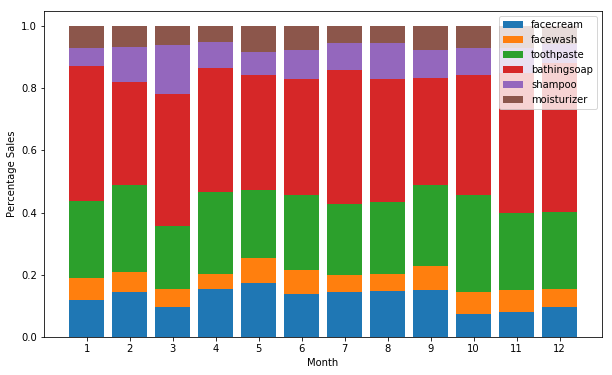

In [23]:
# initialize bottom container
bottom_container = 0

# initialize figure
plt.figure(figsize=(10, 6))

for product in product_names:
    
    # plot product sales
    plt.bar(np.arange(1, 13), df[product + "_perc"], bottom=bottom_container, label=product)
    # update bottom
    bottom_container += df[product + "_perc"]

# add legend
plt.legend(loc="upper right")
plt.xticks(np.arange(1, 13), np.arange(1, 13))
plt.xlabel("Month")
plt.ylabel("Percentage Sales")

# show plot
plt.show()

# Scikit-Learn

Import the customer_churn.csv dataset which can be found in the data directory of this course.
This dataset contains data about a company's customers and whether they left the company or not.
The goal of this exercise is to fit a logistic regression between the independent features and the dependent variable,
such that in the future, the company can predict which customers will be likely to churn.
The Churn variable is the dependent variable. This is a binary variable with No meaning that the customer did not churn and Yes meaning that the customer churned.

In order to build this model, you should do the following steps:
    
        1. Standardize all the numerical independent features. The SeniorCitizen and Tenure variables should not 
           be considered as numerical variables but as categorical. 
            
        2. Encode all the categorical variables
            
        3. Fit a logistic regression model on the data with Churn being the dependent variable and all the other 
           scaled and ecoded variables being the independent features. Note that the customerID should not be
           considered as an independent variable since it serves solely as an identifier and has no discriminative 
           power with respect to the dependent variable.
           
        4. Get the estimated values for the dependent variable
        
        5. Get the accuracy, precision and recall of the model and interpret the results

In [50]:
# define the path of the data
data_path = "../data/customer_churn.csv"

# import data
df = pd.read_csv(data_path)

In [51]:
# import the standard scaler
from sklearn.preprocessing import StandardScaler

# define all variables to standardize
all_vars_to_stand = ["TotalCharges", "MonthlyCharges"]

# initialize the scaler
scaler = StandardScaler()

# fit the scaler
scaler.fit(df[all_vars_to_stand])

# transform the data
df[all_vars_to_stand] = scaler.transform(df[all_vars_to_stand])

In [52]:
# check
df[all_vars_to_stand].describe()

,TotalCharges,MonthlyCharges
count,7.043000e+03,7.043000e+03
mean,-2.667184e-17,-8.291599e-17
std,1.000071e+00,1.000071e+00
min,-1.005780e+00,-1.545860e+00
25%,-8.299464e-01,-9.725399e-01
50%,-3.905282e-01,1.857327e-01
75%,6.648034e-01,8.338335e-01
max,2.825806e+00,1.794352e+00


In [53]:
# import  label encoder
from sklearn.preprocessing import LabelEncoder

# get all the variables to encode
all_vars_to_encode = list(df.columns)

# remove customerID and numeric variables
all_vars_to_encode.remove("customerID")
all_vars_to_encode.remove("TotalCharges")
all_vars_to_encode.remove("MonthlyCharges")


# loop through all variables
for var in all_vars_to_encode:
    
    # define label encoder
    label_encoder = LabelEncoder()

    # fit label encoder
    label_encoder.fit(df[var])
    
    # transform
    df[var] = label_encoder.transform(df[var])

In [54]:
# check
df[all_vars_to_encode].head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,1


In [55]:
# import the logistic regression model
from sklearn.linear_model import LogisticRegression

# define all independent variable
all_indep_vars = list(df.columns)
all_indep_vars.remove("customerID")
all_indep_vars.remove("Churn")

# initialize logistic regression model
model = LogisticRegression()

# fit the logistic regression model on the data
model.fit(X=df[all_indep_vars], y=df["Churn"])

# get the predictions for the dependent variable
predictions = model.predict(df[all_indep_vars])

In [56]:
# import the metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score

# get accuracy
acc = accuracy_score(df["Churn"], predictions)

# get the precision
prec = precision_score(df["Churn"], predictions)

# get the recall
recall = recall_score(df["Churn"], predictions)

In [57]:
print("acc: %s -- precision: %s -- recall: %s" %(acc, prec, recall))

acc: 0.8040607695584268 -- precision: 0.6568313021167415 -- recall: 0.5478865703584804


## Exercise 2

Now that the model which you build in the previous exercise works, 
the company will use it to predict which customer will be likely to churn.
The company has gathered a new dataset of new customers and wants to apply the model on it.
This dataset can be found in the data directory of this course and is called new_customers.csv.

More specifically, the company wants you to do the following things:
    
        1. Use the model which was trained in the previous exercise to get predictions on the new data sample.
           Use the model's predict_proba() method to get the predicted probabilites instead of the predicted 
           classes. This will result in the predicted probabilities per class of the dependent variable for each   
           observation and looks as follows:
           
                           P(y = 0) (not-churn)     P(y = 1) (churn)
                           
                                   0.3                   0.7
                                   0.4                   0.6
                                   0.9                   0.1
                                   ...                   ...
 

        2. Get the 100 customers who have the highest estimated probability to churn and thus are the most likely
           to leave the company. The output should be a pandas DataFrame with 2 columns: one with the customerID 
           and one with the predicted probability of churn


In [59]:
# define the path of the data
data_path = "../data/new_customers.csv"

# import the dataset
df = pd.read_csv(data_path)

In [60]:
# check
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,3677-IYRBF,0,1,0,0,2,0,1,0,0,0,2,0,0,0,0,1,2,-1.142043,-0.971081
1,7590-VHVEG,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,-1.160323,-0.992611
2,6674-KVJHG,0,0,0,0,11,1,2,2,1,1,1,1,1,1,1,0,2,-1.314870,-0.897624
3,6625-IUTTT,1,0,0,0,67,1,0,0,2,0,2,0,0,2,2,0,0,0.026200,0.918462
4,7665-VIGUD,1,0,0,0,10,1,0,2,1,1,1,1,1,1,1,0,3,-1.476064,-0.927999


In [61]:
# get the cust ids
cust_ids = df["customerID"]

# drop the customerID variable
df = df.drop(columns="customerID")

In [62]:
# apply the model on the data and make predictions for the dependent variable
predictions = model.predict_proba(df)

In [63]:
# check
predictions

array([[0.34372794, 0.65627206],
       [0.41557592, 0.58442408],
       [0.90721995, 0.09278005],
       ...,
       [0.81058437, 0.18941563],
       [0.56037625, 0.43962375],
       [0.78500043, 0.21499957]])

In [64]:
# get the predictions of churn
predictions_churn = predictions[:, 1]

In [65]:
# append to customer id
pred_df = pd.DataFrame({"cust_id": cust_ids, "prob_churn": predictions_churn})

# check
pred_df.head()

,cust_id,prob_churn
0,3677-IYRBF,0.656272
1,7590-VHVEG,0.584424
2,6674-KVJHG,0.092780
3,6625-IUTTT,0.008419
4,7665-VIGUD,0.077309


In [66]:
# sort by probability to churn
pred_df = pred_df.sort_values(by="prob_churn", ascending=False)

# get the 100 customers which are most likely to churn
top_100 = pred_df.iloc[:100, :]

In [67]:
# check
top_100.head()

,cust_id,prob_churn
224,9057-SIHCH,0.807499
675,9057-SIHCH,0.807499
684,7851-WZEKY,0.807010
793,3049-SOLAY,0.805075
54,0781-LKXBR,0.802831
